## NEURAL EVOLUTION FROM SCRATCH

This is a neural network evolved by genetic algorithm using only python and numpy library.  

This implementation is slow and take some hours to converge for good results.  

 I used a minimalist version of blackjack (A game known as 21 or vinte-um in Brazil). 
 

 The neural network use as inputs itself pontuation, the player with higher pontuation less than 21 and the cummulative sum of all cads played until that particular turn.  

<img src='https://brasilcasinos.com.br/images/maos-do-blackjack.jpg'>

Short Game explanation:
    
    - The players start with 2 cards
    - The sum of those cards should be exactly 21 in order to win the game.
    - Each turn, the players CAN DECIDE to draw a new card to try approximate the current value to 21.  
    - Case the sum of all cards in the player's hand is higher than 21,  that player lost the game.
    - The Player with score closest to 21 is the winner.  


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import logistic
import pandas as pd
import copy
from random import shuffle, sample
import random



### Creating a simple blackjack game.

In [2]:
class Game:
    def __init__(self):
        self.deck =  4* range(1,11)
        shuffle(self.deck)
        self.game_running = False
        self.cumulative_draw = 0 
        self.best_player_score = 0
    def start_game(self, player_list):
        while  len([p for p in player_list if p.burn == False and p.stop == False]) > 1:
            for player in [p_t for p_t in player_list if p_t.burn == False and p_t.stop == False]:
                #print player.name,player.points
                if player.decision(self)[0] == 0:
                    player.stop_game()
                else:
                    self.cumulative_draw += player.draw(self.deck)
                if self.best_player_score < player.points:
                    self.best_player_score = player.points
        #print [[p_e.name, p_e.points] for p_e in player_list]
        winner_table =  [p_e for p_e in player_list if p_e.burn == False]
        winner_table = sorted(winner_table, key = lambda x : 21 - x.points)
        #print [p_e.points for p_e in winner_table] 
        #print 'Game ended...'
        
         
        if set([p_end.points for p_end in winner_table]) == 1 or not winner_table:
            #print 'ko'
            return 'ko'
        else:
            #print 'ganhador',   winner_table[0].name 
            return winner_table[0].name
        
        

### Defining the Player class

In [3]:
class Player:
    def __init__(self, name):
        self.stop = False
        self.burn = False
        self.points = 0
        self.name = name
        self.neural_network = None
    def decision(self, game_obj):
        
        out = sample([0,1], 1) # the output shoud be [0] or [1]
        #print out 
        return out  # random behavior
    
    def stop_game(self):
        #print self.name, 'Stop'
        self.stop = True
    def draw(self, deck_game):
        
        card = deck_game.pop()
        #print self.name, 'comprou card', card
        self.points += card
        if self.points > 21:
            self.burn = True
            #print self.name, 'BURNEDD!'
        return card
            
    
    

        

### Gerating simple Players usig Player class inheritance and  overwriting the decision method.

In [4]:
class First_strategy(Player):
    def decision(self, game_obj):
        if self.points < 15:
            return [1]
        else:
            return [0]
    
class Second_strategy(Player):
    def decision(self, game_obj):
        return [1]

### Simulating a simple championship with 3 different players.

In [5]:
matchs = []

for x in range(100):
    jogo = Game()
    lucas = First_strategy('Lucas')
    miura = Player('Miura')
    sergio = Second_strategy('Sergio')
    
    matchs.append(jogo.start_game([lucas, miura, sergio]))

print len([m for m in matchs if m == 'Miura'])
print matchs

8
['Miura', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Miura', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Miura', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Sergio', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Sergio', 'Sergio', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Sergio', 'Lucas']


###  Neural network class implementation with forward propagation

In [6]:
class Network:
    def __init__(self, input_number = 2):
        self.l_1 = np.random.uniform(-1,1, [10,input_number])

        self.l_2 = np.random.uniform(-1,1,[10,10])
        self.l_end = np.random.uniform(-1,1,[1,10])
        self.layers_stack = [self.l_1 , self.l_2 , self.l_end]
    
    
    def sigmoid (self, x): return 1/(1 + np.exp(-x))
    
    def foward(self, input_value):
        #print input_value
        res_l1 =  np.array([self.sigmoid(l1_s) for l1_s in      input_value.dot(self.l_1.T)])
        res_l2 = np.array([ self.sigmoid(l2_s)  for l2_s in     res_l1.dot(self.l_2.T)])
        res_end = np.array([self.sigmoid (l_r) for l_r in       res_l2.dot(self.l_end.T)])
        #print res_end
        return res_end
    
    def mutate(self, layer):
        index_to_mutate = [np.random.randint(layer.shape[0]), np.random.randint(layer.shape[1])]
        #print 'mutate',  np.random.uniform(-1, 1)
        layer[index_to_mutate[0], index_to_mutate[1]] += np.random.uniform(-0.01, 0.01)
        
        
    def mutate_all_layers(self):
        for l in self.layers_stack:
            self.mutate(l)
    

### Creating a Neural Network Player

The decision method returns 0 (stop),1 (draw a card)
The inputs  are: 

- Agent score.
- Highest opponent pontuation.
- Sum of all cards played until that moment

In [7]:
class Neural_strategy(Player):
    def decision(self, game_obj):
        best_rank_player = game_obj.best_player_score
        #print best_rank_player
        #print  [self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))]

        return [int(round(self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))))]

    def init_neural_activity(self):
        self.neural_network = Network(input_number = 3)
    def reset_status(self):
        self.stop = False
        self.burn = False
        self.points = 0
        

        

### Training/Evolving the neural networks

using the follow parameters. 
-  population = 500  
-  iterations = 100  
- matchs per championship = 300  
- The two best AI neural networks are choosed to ploriferate and mutate.  
- Fitness fuction is given as the mean of championship won games. 

In [8]:
best_and_mean_scores = []
p_size= 500
population = [Neural_strategy('AI') for n in range(0,p_size)]

[p.init_neural_activity() for p in population] #starting network random weights

from tqdm import tqdm
for i_n in range(200):
    fitness = []
    for ai in tqdm(population):
        matchs = []
        f = 0
        for x in range(60):
            jogo = Game()
            lucas = First_strategy('Lucas')
            matchs.append(jogo.start_game([ ai, lucas]))
            ai.reset_status()
        #print matchs
        f =  100 * (len([m for m in matchs if m == 'AI'])/float(len(matchs)))
        #print f 
        fitness.append(f)
    higher_fitness = sorted( [[f, p_f] for f , p_f in zip(fitness, population)], key=lambda s: s[0])
    print 'Iteration MEAN:', np.mean([v[0] for v in higher_fitness])
        
    loss_str= 'Best value: {}'.format(str(higher_fitness[-1][0]))
    best_and_mean_scores.append([higher_fitness[-1][0], np.mean([v[0] for v in higher_fitness])])
    itr_str = 'Iteration: {}'.format( str(i_n))
    print itr_str, loss_str
    #print [ h[0] for h in  higher_fitness[-5:]]
    best_creatures = higher_fitness[-10:]
    #print [float(b_c) for b_c in best_creatures]
    population = [copy.deepcopy(random.choice(best_creatures)[1]) for i in range(0, p_size)]
    [p_m.neural_network.mutate_all_layers() for p_m in population]

    

  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 12.49
Iteration: 0 Best value: 61.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 29.53333333333333
Iteration: 1 Best value: 61.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 47.336666666666666
Iteration: 2 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.33333333333334
Iteration: 3 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.36000000000001
Iteration: 4 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.170000000000016
Iteration: 5 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.83666666666667
Iteration: 6 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.87333333333334
Iteration: 7 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.64000000000001
Iteration: 8 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.83333333333334
Iteration: 9 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.69000000000001
Iteration: 10 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.58666666666667
Iteration: 11 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.193333333333335
Iteration: 12 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.73333333333334
Iteration: 13 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.87333333333334
Iteration: 14 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.41666666666667
Iteration: 15 Best value: 71.6666666667


100%|██████████| 500/500 [00:48<00:00, 10.31it/s]


Iteration MEAN: 49.82000000000001
Iteration: 16 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.673333333333346
Iteration: 17 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.046666666666674
Iteration: 18 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.89
Iteration: 19 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.38333333333334
Iteration: 20 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.72333333333334
Iteration: 21 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.95
Iteration: 22 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.59333333333334
Iteration: 23 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.65333333333334
Iteration: 24 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.180000000000014
Iteration: 25 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.780000000000015
Iteration: 26 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.360000000000014
Iteration: 27 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.193333333333335
Iteration: 28 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.46000000000001
Iteration: 29 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 48.966666666666676
Iteration: 30 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.27666666666667
Iteration: 31 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.1
Iteration: 32 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.26666666666667
Iteration: 33 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.673333333333346
Iteration: 34 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.15333333333334
Iteration: 35 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.89
Iteration: 36 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.31
Iteration: 37 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.81
Iteration: 38 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.05666666666667
Iteration: 39 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.74333333333333
Iteration: 40 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.39333333333334
Iteration: 41 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.10333333333334
Iteration: 42 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.34
Iteration: 43 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.720000000000006
Iteration: 44 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.64
Iteration: 45 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.68
Iteration: 46 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.39666666666667
Iteration: 47 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.863333333333344
Iteration: 48 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.73
Iteration: 49 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.01666666666667
Iteration: 50 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.883333333333326
Iteration: 51 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.92333333333334
Iteration: 52 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.13666666666667
Iteration: 53 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.24
Iteration: 54 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.09666666666667
Iteration: 55 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.77333333333333
Iteration: 56 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.69333333333333
Iteration: 57 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.15
Iteration: 58 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.943333333333335
Iteration: 59 Best value: 70.0


100%|██████████| 500/500 [00:49<00:00,  9.81it/s]


Iteration MEAN: 50.773333333333326
Iteration: 60 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.83666666666667
Iteration: 61 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.22
Iteration: 62 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.843333333333334
Iteration: 63 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.08333333333333
Iteration: 64 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.26
Iteration: 65 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.206666666666656
Iteration: 66 Best value: 70.0


100%|██████████| 500/500 [00:52<00:00,  9.47it/s]


Iteration MEAN: 51.06666666666666
Iteration: 67 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.06333333333333
Iteration: 68 Best value: 66.6666666667


100%|██████████| 500/500 [00:52<00:00,  7.74it/s]


Iteration MEAN: 50.683333333333344
Iteration: 69 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.33666666666666
Iteration: 70 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.71333333333334
Iteration: 71 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.14999999999999
Iteration: 72 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.58666666666667
Iteration: 73 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.87
Iteration: 74 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.796666666666674
Iteration: 75 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.71333333333334
Iteration: 76 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.06666666666667
Iteration: 77 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.09
Iteration: 78 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.703333333333326
Iteration: 79 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.193333333333335
Iteration: 80 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.81
Iteration: 81 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.67000000000001
Iteration: 82 Best value: 68.3333333333


100%|██████████| 500/500 [00:49<00:00, 10.11it/s]


Iteration MEAN: 50.97666666666666
Iteration: 83 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.13
Iteration: 84 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.87
Iteration: 85 Best value: 71.6666666667


100%|██████████| 500/500 [00:48<00:00,  9.89it/s]


Iteration MEAN: 51.526666666666664
Iteration: 86 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.55666666666667
Iteration: 87 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.81666666666667
Iteration: 88 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.186666666666675
Iteration: 89 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.02
Iteration: 90 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.32666666666666
Iteration: 91 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.33666666666666
Iteration: 92 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.25
Iteration: 93 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.48333333333333
Iteration: 94 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.426666666666655
Iteration: 95 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.23
Iteration: 96 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.95666666666667
Iteration: 97 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.44
Iteration: 98 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.10333333333334
Iteration: 99 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 50.86333333333334
Iteration: 100 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.42999999999999
Iteration: 101 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.53333333333333
Iteration: 102 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.383333333333326
Iteration: 103 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.53999999999999
Iteration: 104 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.849999999999994
Iteration: 105 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.986666666666665
Iteration: 106 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.84666666666666
Iteration: 107 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.48333333333333
Iteration: 108 Best value: 66.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.32333333333333
Iteration: 109 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.69333333333333
Iteration: 110 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.78333333333333
Iteration: 111 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.96666666666666
Iteration: 112 Best value: 70.0


100%|██████████| 500/500 [00:50<00:00,  8.88it/s]


Iteration MEAN: 51.79333333333333
Iteration: 113 Best value: 68.3333333333


100%|██████████| 500/500 [00:53<00:00,  9.28it/s]


Iteration MEAN: 51.55333333333333
Iteration: 114 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.65
Iteration: 115 Best value: 73.3333333333


100%|██████████| 500/500 [00:52<00:00,  9.50it/s]


Iteration MEAN: 51.986666666666665
Iteration: 116 Best value: 78.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.71333333333333
Iteration: 117 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.23333333333333
Iteration: 118 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.529999999999994
Iteration: 119 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.633333333333326
Iteration: 120 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.94333333333333
Iteration: 121 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.5
Iteration: 122 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.383333333333326
Iteration: 123 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.78333333333333
Iteration: 124 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.31999999999999
Iteration: 125 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.58333333333333
Iteration: 126 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.14999999999999
Iteration: 127 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.75666666666667
Iteration: 128 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.459999999999994
Iteration: 129 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 51.97666666666666
Iteration: 130 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.62666666666667
Iteration: 131 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.279999999999994
Iteration: 132 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.756666666666675
Iteration: 133 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.93333333333333
Iteration: 134 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.50333333333333
Iteration: 135 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.28666666666667
Iteration: 136 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.213333333333345
Iteration: 137 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.703333333333326
Iteration: 138 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.64666666666666
Iteration: 139 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.883333333333326
Iteration: 140 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.05333333333333
Iteration: 141 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.176666666666655
Iteration: 142 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.10666666666667
Iteration: 143 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.88
Iteration: 144 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.99666666666667
Iteration: 145 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.73333333333333
Iteration: 146 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.026666666666664
Iteration: 147 Best value: 68.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.31666666666667
Iteration: 148 Best value: 71.6666666667


100%|██████████| 500/500 [00:47<00:00, 10.61it/s]


Iteration MEAN: 52.98
Iteration: 149 Best value: 80.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.25000000000001
Iteration: 150 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.12
Iteration: 151 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.14666666666667
Iteration: 152 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.14
Iteration: 153 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.38
Iteration: 154 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.31
Iteration: 155 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 52.696666666666665
Iteration: 156 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.086666666666666
Iteration: 157 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.10666666666667
Iteration: 158 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.71333333333334
Iteration: 159 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.49
Iteration: 160 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.5
Iteration: 161 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.580000000000005
Iteration: 162 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.27333333333333
Iteration: 163 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.02
Iteration: 164 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.120000000000005
Iteration: 165 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.26
Iteration: 166 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.88333333333334
Iteration: 167 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.546666666666674
Iteration: 168 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.84333333333334
Iteration: 169 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.31000000000002
Iteration: 170 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.65000000000001
Iteration: 171 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.59333333333334
Iteration: 172 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.52333333333334
Iteration: 173 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.42666666666667
Iteration: 174 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.87333333333334
Iteration: 175 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 55.08666666666667
Iteration: 176 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.863333333333344
Iteration: 177 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.59333333333334
Iteration: 178 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.796666666666674
Iteration: 179 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.666666666666686
Iteration: 180 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.98666666666667
Iteration: 181 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 55.01333333333334
Iteration: 182 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 53.89666666666667
Iteration: 183 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.603333333333346
Iteration: 184 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.94333333333334
Iteration: 185 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.30666666666668
Iteration: 186 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.99333333333335
Iteration: 187 Best value: 76.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.48666666666668
Iteration: 188 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.80333333333334
Iteration: 189 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.94666666666667
Iteration: 190 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.323333333333345
Iteration: 191 Best value: 78.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.7
Iteration: 192 Best value: 71.6666666667


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.76666666666667
Iteration: 193 Best value: 75.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.49666666666668
Iteration: 194 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 55.01333333333334
Iteration: 195 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.61000000000001
Iteration: 196 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 55.13
Iteration: 197 Best value: 73.3333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 54.94333333333334
Iteration: 198 Best value: 76.6666666667


100%|██████████| 500/500 [00:47<00:00, 10.43it/s]


Iteration MEAN: 55.173333333333346
Iteration: 199 Best value: 76.6666666667


In [9]:
## Ploting the mean game values 

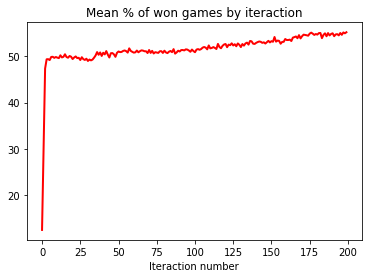

In [10]:
df_training = pd.DataFrame(best_and_mean_scores, columns=['best_result', 'mean_result'])


plt.plot(df_training['mean_result'], color= 'red', lw=2)
plt.title('Mean % of won games by iteraction')
plt.xlabel('Iteraction number')
plt.show()

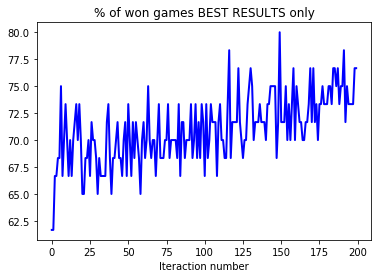

In [11]:
plt.plot(df_training['best_result'], color= 'blue', lw=2)
plt.title('% of won games BEST RESULTS only')
plt.xlabel('Iteraction number')
plt.show()

In [12]:
score_teste = 0
for g in range(1000):
    jogo = Game()
    lucas = First_strategy('Lucas')
    ai = copy.deepcopy(best_creatures[-1][1])

    r =  jogo.start_game([lucas, ai])
    if r =='AI':
        score_teste +=1
    ai.reset_status()
score_teste

502

In [139]:
score_teste = 0
for g in range(100):
    if   == "ai":
        score_teste +=1
    ai.reset_status()
    score_teste

0

In [136]:
print jogo.start_game([lucas, ai])
ai.reset_status()

Lucas


In [100]:
print jogo.start_game([lucas, ai])
ai.reset_status()

Lucas
